In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../media/data/art/cksum.csv", error_bad_lines=False, header=None, usecols=[0,1])
df["value"] = df[1].apply(lambda x: x.split()[1]).apply(lambda x: int(x,16))
df = df.sample(len(df.index))
df.reset_index(drop=True,inplace=True)
df.head()

,0,1,value
0,delton.50107 > 144.34.170.100.16clouds.com...,cksum 0x7987 (correct),31111
1,172.67.74.104.https > delton.34406: Flags ...,cksum 0xa07d (correct),41085
2,delton.34138 > mba01s08-in-f5.1e100.net.ht...,cksum 0x1eb3 (correct),7859
3,delton.51575 > 185.162.184.34.52281: Flags...,cksum 0x6f68 (correct),28520
4,delton.51792 > mba01s08-in-f3.1e100.net.ht...,cksum 0x3d6a (correct),15722


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293776 entries, 0 to 293775
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       293776 non-null  object
 1   1       293776 non-null  object
 2   value   293776 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.7+ MB


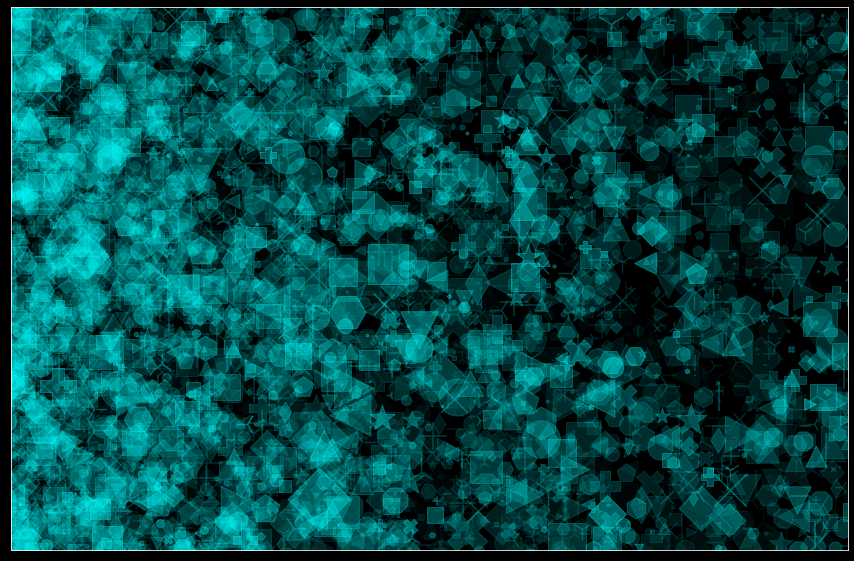

In [4]:
df["x"] = np.random.rand(len(df.index)) * 100000 * np.random.rand(len(df.index))
df["y"] = np.random.rand(len(df.index)) * 100000

dfs = df.sample(20000)

style = np.random.choice(["dark_background"])
plt.style.use(style)
plt.figure(figsize=(15,10))

plt.xticks([])
plt.yticks([])

plt.xlim(6000,60000)
plt.ylim(6000,60000)

for i in dfs.index:
    marker = np.random.choice([".",",","o","v","^","<",">","1","2","3","4","8","s","p","P",
                               "*","h","H","+","x","X","d","D","|","_"])
    c = ((0,1,1,0))
    
    rand_divisor = 100
    size = dfs.loc[i,"value"]/(np.random.choice(np.abs(rand_divisor/np.random.normal(-1,1,len(dfs.index)))))

    alpha = np.random.choice(np.abs(np.random.normal(-0.1,0.1,len(dfs.index))))

    plt.scatter(dfs.loc[i,"x"], dfs.loc[i,"y"], marker=marker, color=c,
                s=size, alpha=alpha)

plt.show();